In [35]:
### 5. Índices de validación de los resultados de agrupamiento ###
import pandas as pd

In [37]:
house = pd.read_csv('housedata.csv')
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [39]:
house2 = house.copy() # guardamos copia

In [41]:
# Transformar 'date' en número de días desde el mínimo
house2['date'] = pd.to_datetime(house2['date'])
house2['date'] = (house2['date'] - house2['date'].min()).dt.days

In [43]:
# Transformamos las columnas categóricas a texto
for col in house2.columns: # recorre cada columna del DataFrame.
    if house2[col].dtype == 'Object': # si el tipo de dato de la columna es “texto” (ej: ‘street’ o ‘country’), entra
        house2[col] = OrdinalEncoder().fit_transform(house2[[col]]) # transforma los textos en números

In [45]:
# Convertimos el DataFrame a una matriz NumPy
X_train = house2.to_numpy()

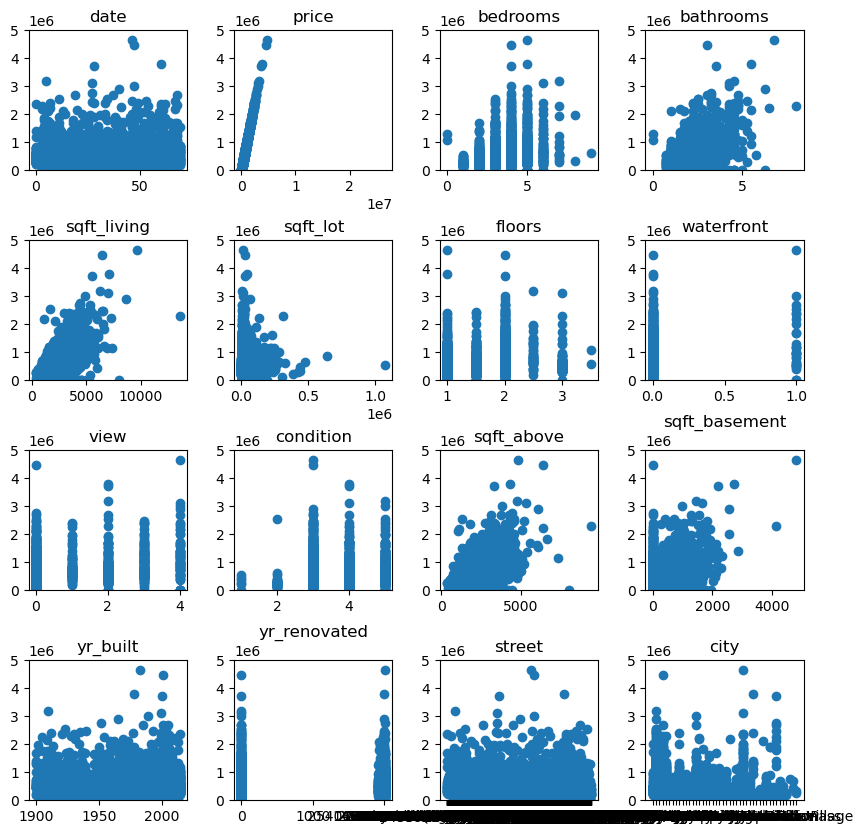

In [47]:
import matplotlib.pyplot as plt
v = 0
fig, axs = plt.subplots(4, 4, figsize=(10, 10)) # prepara una figura con 16 gráficos (4x4)
for i in range(4): 
    for j in range(4): # recorre las 16 casillas (como una tabla)
        axs[i,j].scatter(X_train[:,v], X_train[:,1])
        axs[i,j].set_title(house.columns[v])
        axs[i,j].set_ylim([0,0.5e7])
        v += 1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [48]:
## Índices de validación de agrupamientos ## -> ayudan a evaluar qué tan bien se agruparon los datos después de aplicar K-Means
# Índices externos -> Comparan los grupos obtenidos contra una verdad conocida (ground truth). No se suelen usar ya que generalmente se desconoce la verdad de los datos
# Índices internos -> Evalúan: A) Qué tan compactos son los grupos (datos dentro del mismo grupo están cerca) y B) Qué tan separados están los grupos entre sí (los grupos son distintos entre sí). Son los más usados

In [49]:
## Silhoutte es el más común -> Mide qué tan bien ubicado está un dato en su grupo ##
# * Se acerca a 1 → El punto está muy bien agrupado.
# * Se acerca a 0 → El punto está en el borde entre dos grupos.
# * Se acerca a -1 → Probablemente mal agrupado.

In [50]:
## Para comenzar a trabajar con Silhoutte debemos primero tener agrupados los datos
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

# 1) Escalamos los datos
X = StandardScaler().fit_transform(X_train) # Normalizamos datos
k_means = cluster.KMeans(n_clusters=2).fit(x)

ValueError: could not convert string to float: '18810 Densmore Ave N'

In [ ]:
# En esta situación en que varias variables tienen valores distintos, se generaría muchas variables con OneHotEncoder
# Por tanto, por esta ocasión, es mejor usar OrdinalEncoder
